In [1]:
import numpy as np 
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from cdo import *
import os
import pymannkendall as mk

In [2]:
CDO = Cdo()

* Most IMP Code

In [11]:
path = './A_Stack_Yearwise/TXT Files/'
hours = [0,3,6,9,12,15,18,21]
List_Files = []
for year in range(2000,2020):
    for hour in hours:
        List_Files = []
        file = open(f'./A_Stack_Yearwise/TXT Files/{year}_{hour}_Stack.txt','r')
        for i in file:
            i = i.replace("\n","")
            List_Files.append(i+"  ")
        CDO.cat(input=List_Files,output=f'./A_Stack_Yearwise/Stacks/{year}_{hour}_stack.nc')
        file.close()


In [7]:
stacks = os.listdir('../A_Stack_Yearwise/Stacks/1998')
stacks.sort()
print(stacks)

['1998_00_stack.nc', '1998_03_stack.nc', '1998_06_stack.nc', '1998_09_stack.nc', '1998_12_stack.nc', '1998_15_stack.nc', '1998_18_stack.nc', '1998_21_stack.nc']


In [8]:
for file in stacks:
    print(file)

1998_00_stack.nc
1998_03_stack.nc
1998_06_stack.nc
1998_09_stack.nc
1998_12_stack.nc
1998_15_stack.nc
1998_18_stack.nc
1998_21_stack.nc


In [9]:
CDO.etccdi_cdd(input='../A_Stack_Yearwise/Stacks/1998/1998_00_stack.nc',output="./1998_00_CDD.nc")

'./1998_00_CDD.nc'

In [16]:
cdd_1998 = xr.open_dataset('../INDICES/CDD_Consecutive_Dry_Days/1998_cdd.nc')
cdd_1998['cddETCCDI'][0].values

array([['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ...,
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT']],
      dtype='timedelta64[ns]')

In [20]:
for i in cdd_1998['cddETCCDI'][0].values:
    print(i)

['NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT'
 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT'
 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT'
 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT'
 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT'
 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT'
 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT'
 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT'
 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT'
 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT' 'NaT']
[           'NaT'            'NaT'            'NaT'            'NaT'
            'NaT'            'NaT'            'NaT'            'NaT'
            'NaT'            'NaT'            'NaT'            'NaT'
            'NaT'            'NaT'            'NaT'            'NaT'

In [25]:
d = cdd_1998['cddETCCDI'].sel(lat=slice(22.6916,24.42),lon=slice(72.8634,74.28))
d[0]

<xarray.DataArray 'cddETCCDI' (lat: 7, lon: 6)>
array([[2505600000000000, 5529600000000000, 5529600000000000,
        2764800000000000, 3196800000000000, 3196800000000000],
       [2246400000000000, 4406400000000000, 5616000000000000,
        5616000000000000, 2764800000000000, 2764800000000000],
       [2505600000000000, 3715200000000000, 5356800000000000,
        5961600000000000, 4752000000000000, 4752000000000000],
       [2505600000000000, 2505600000000000, 5529600000000000,
        6739200000000000, 6480000000000000, 6480000000000000],
       [4060800000000000, 4060800000000000, 3715200000000000,
        6739200000000000, 6480000000000000, 3369600000000000],
       [6480000000000000, 5529600000000000, 5529600000000000,
        6739200000000000, 6739200000000000, 6048000000000000],
       [4233600000000000, 6480000000000000, 4233600000000000,
        7689600000000000, 6912000000000000, 3888000000000000]],
      dtype='timedelta64[ns]')
Coordinates:
    time     datetime64[ns] 1998-07-02T12:00:00
  * lon      (lon) float64 72.88 73.12 73.38 73.62 73.88 74.12
  * lat      (lat) float64 22.88 23.12 23.38 23.62 23.88 24.12 24.38
Attributes:
    long_name:  Maximum Number of Consecutive Days with Less Than 1mm of Prec...

In [41]:
plot_data=[]
temp_data=[]
for i in d[0].values:
    temp_data=[]
    for j in i:
        # print(str(j).split(' ')[0])
        temp_data.append(float(str(j).split(' ')[0]))
    plot_data.append(temp_data)
plot_data

[[2505600000000000.0,
  5529600000000000.0,
  5529600000000000.0,
  2764800000000000.0,
  3196800000000000.0,
  3196800000000000.0],
 [2246400000000000.0,
  4406400000000000.0,
  5616000000000000.0,
  5616000000000000.0,
  2764800000000000.0,
  2764800000000000.0],
 [2505600000000000.0,
  3715200000000000.0,
  5356800000000000.0,
  5961600000000000.0,
  4752000000000000.0,
  4752000000000000.0],
 [2505600000000000.0,
  2505600000000000.0,
  5529600000000000.0,
  6739200000000000.0,
  6480000000000000.0,
  6480000000000000.0],
 [4060800000000000.0,
  4060800000000000.0,
  3715200000000000.0,
  6739200000000000.0,
  6480000000000000.0,
  3369600000000000.0],
 [6480000000000000.0,
  5529600000000000.0,
  5529600000000000.0,
  6739200000000000.0,
  6739200000000000.0,
  6048000000000000.0],
 [4233600000000000.0,
  6480000000000000.0,
  4233600000000000.0,
  7689600000000000.0,
  6912000000000000.0,
  3888000000000000.0]]

In [42]:
pd.DataFrame(plot_data).shape

(7, 6)

<Axes: >

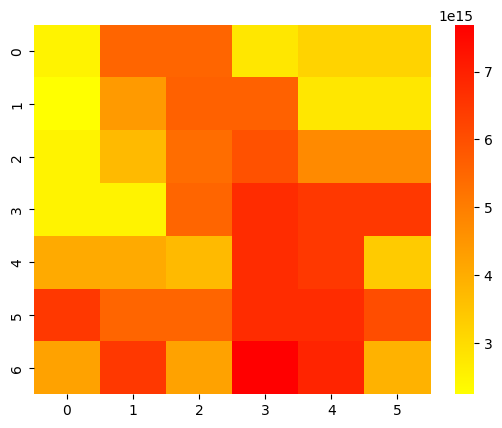

In [43]:
sns.heatmap(pd.DataFrame(plot_data),cmap='autumn_r')

In [76]:
plot_data_cdd=[]
years=[]
for year in range(1998,2020):
    years.append(year)
    cdd_data = xr.open_dataset(f'../INDICES/CDD_Consecutive_Dry_Days/{year}_cdd.nc')
    cdd_data = cdd_data['cddETCCDI'].sel(lat=slice(22.6916,24.42),lon=slice(72.8634,74.28))
    value=0
    for i in cdd_data[0].values:
        for j in i:
            # print(float(str(j).split(' ')[0]))
            value = value + (float(str(j).split(' ')[0]))
    value = value/(8.64e+13*42)
    plot_data_cdd.append(value)
pd.DataFrame(plot_data).shape
plot_data_cdd
        

[55.76190476190476,
 59.833333333333336,
 54.73809523809524,
 62.45238095238095,
 58.642857142857146,
 44.23809523809524,
 53.61904761904762,
 48.404761904761905,
 47.404761904761905,
 35.19047619047619,
 53.19047619047619,
 45.69047619047619,
 52.42857142857143,
 47.285714285714285,
 42.69047619047619,
 46.095238095238095,
 52.26190476190476,
 47.142857142857146,
 43.38095238095238,
 61.26190476190476,
 39.38095238095238,
 31.095238095238095]

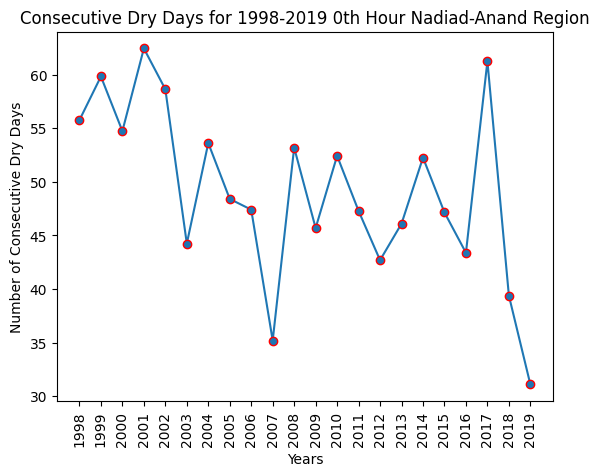

In [71]:
plt.plot(years,plot_data_cdd,marker="o",markeredgecolor="r")
plt.xticks(years,rotation=90)
plt.title("Consecutive Dry Days for 1998-2019 0th Hour Nadiad-Anand Region")
plt.xlabel("Years")
plt.ylabel('Number of Consecutive Dry Days')
plt.show()

In [72]:
plot_data_cwd=[]
years=[]
for year in range(1998,2020):
    years.append(year)
    cwd_data = xr.open_dataset(f'../INDICES/CWD_Consecutive_Wet_Days//{year}_cwd.nc')
    cwd_data = cwd_data['cwdETCCDI'].sel(lat=slice(22.6916,24.42),lon=slice(72.8634,74.28))
    value=0
    for i in cwd_data[0].values:
        for j in i:
            # print(float(str(j).split(' ')[0]))
            value = value + float(str(j).split(' ')[0])
    value = value/(42*8.64e+13)
    plot_data_cwd.append(value)
pd.DataFrame(plot_data_cwd).shape
plot_data_cwd

[1.4523809523809523,
 1.380952380952381,
 1.619047619047619,
 2.0,
 1.4523809523809523,
 1.619047619047619,
 1.5476190476190477,
 1.8095238095238095,
 1.9047619047619047,
 1.7857142857142858,
 1.2142857142857142,
 1.2142857142857142,
 1.2380952380952381,
 1.5238095238095237,
 2.0,
 1.0476190476190477,
 1.380952380952381,
 2.857142857142857,
 1.9523809523809523,
 1.619047619047619,
 1.119047619047619,
 2.3333333333333335]

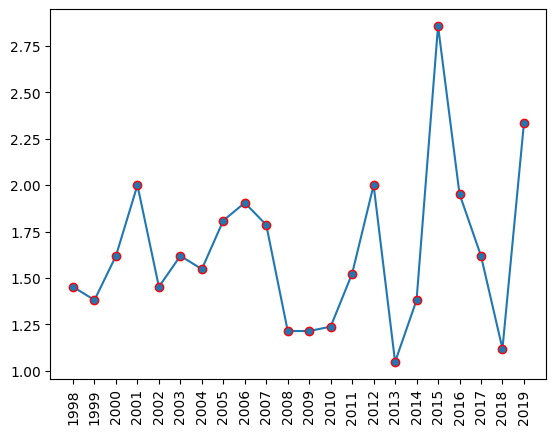

In [73]:
plt.plot(years,plot_data_cwd,marker="o",markeredgecolor="r")
plt.xticks(years,rotation=90)
plt.show()

In [80]:
plot_data_ecar10mm=[]
years=[]
for year in range(1998,2020):
    years.append(year)
    heavy_prec_data = xr.open_dataset(f'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION///{year}_ecar10mm_output.nc')
    heavy_prec_data = heavy_prec_data['heavy_precipitation_days_index_per_time_period'].sel(lat=slice(22.6916,24.42),lon=slice(72.8634,74.28))
    value=0
    for i in heavy_prec_data[0].values:
        for j in i:
            # print(float(str(j).split(' ')[0]))
            value = value + j
    value = value/(42)
    plot_data_ecar10mm.append(value)
pd.DataFrame(plot_data_ecar10mm).shape
plot_data_ecar10mm

[0.0,
 0.07142857142857142,
 0.2857142857142857,
 0.2857142857142857,
 0.0,
 0.21428571428571427,
 0.2857142857142857,
 1.0238095238095237,
 1.119047619047619,
 0.30952380952380953,
 0.30952380952380953,
 0.30952380952380953,
 0.2857142857142857,
 0.16666666666666666,
 0.40476190476190477,
 0.5,
 0.8095238095238095,
 0.2857142857142857,
 0.11904761904761904,
 0.5952380952380952,
 0.09523809523809523,
 0.4523809523809524]

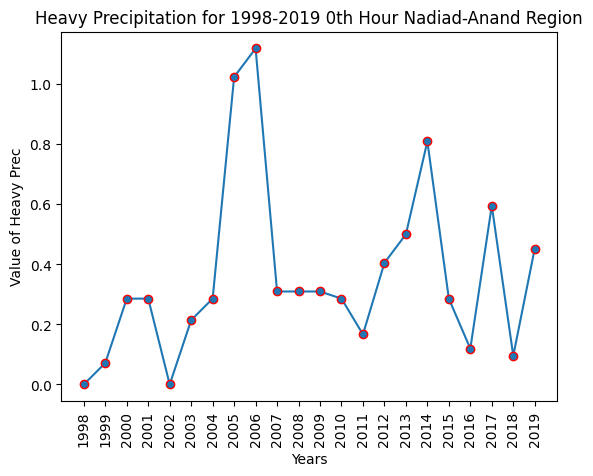

In [82]:
plt.plot(years,plot_data_ecar10mm,marker="o",markeredgecolor="r")
plt.xticks(years,rotation=90)
plt.title("Heavy Precipitation for 1998-2019 0th Hour Nadiad-Anand Region")
plt.xlabel("Years")
plt.ylabel('Value of Heavy Prec')
plt.show()

# Mann Kendall Test

In [23]:
data = [1,2,3,4,5,6,np.NaN]
op = mk.original_test(data)

In [24]:
op

Mann_Kendall_Test(trend='increasing', h=True, p=0.008534920414227098, z=2.630142022557628, Tau=1.0, s=15.0, var_s=28.333333333333332, slope=1.0, intercept=1.0)

<Axes: >

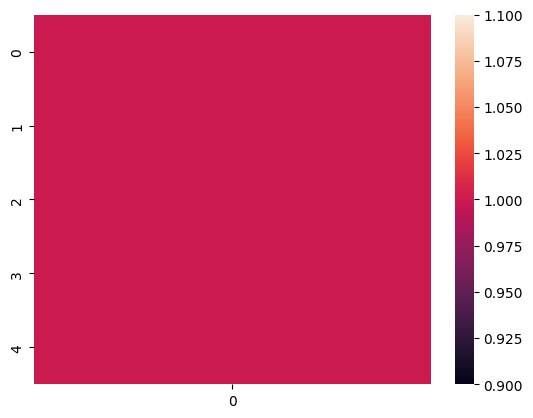

In [18]:
sns.heatmap(pd.DataFrame(data))

In [44]:
very_heavy_prec = xr.open_dataset('../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/2019_ecar10mm_output.nc')
very_heavy_prec['heavy_precipitation_days_index_per_time_period'].values[0].shape

(117, 119)

# Heavy Precipitation

In [45]:
heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/{year}_ecar10mm_output.nc')
    heavy_prec.append(data['heavy_precipitation_days_index_per_time_period'].values[0])

## 0th Hour

In [75]:
heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/{year}_eca_r10mm/{year}_00_eca_r10mm.nc')
    heavy_prec.append(data['heavy_precipitation_days_index_per_time_period'].values[0])
heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [76]:
len(heavy_prec[1:])

21

In [77]:
row=0
col=0
year=1
data_all_year_heacy_prec = []
plot_data=[]
mk_test_all_values=[]
all_values_for_heavy_prec_on_each_grid = []
for grids in heavy_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_heacy_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_heacy_prec.append(grid_point)
        for index in range(1,22):
            # if(str(heavy_prec[index][row][col])!='nan'):
            data_all_year_heacy_prec.append(heavy_prec[index][row][col])
        all_values_for_heavy_prec_on_each_grid.append(data_all_year_heacy_prec)
        try:
            op = mk.original_test(data_all_year_heacy_prec) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1

In [78]:
plot_data = np.array(plot_data).reshape(117,119)

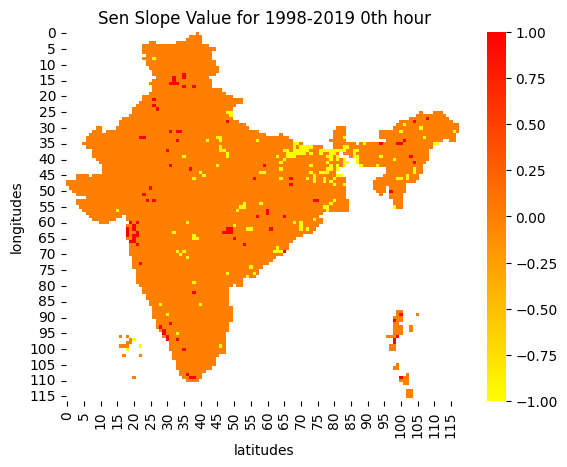

In [79]:
sns.heatmap(data=plot_data[::-1],cmap='autumn_r')
plt.title('Sen Slope Value for 1998-2019 0th hour')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_0th_hour.png',format='png')

## 3rd Hour

In [80]:
heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/{year}_eca_r10mm/{year}_03_eca_r10mm.nc')
    heavy_prec.append(data['heavy_precipitation_days_index_per_time_period'].values[0])
heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [81]:
row=0
col=0
year=1
data_all_year_heacy_prec = []
plot_data=[]
mk_test_all_values=[]
all_values_for_heavy_prec_on_each_grid = []
for grids in heavy_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_heacy_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_heacy_prec.append(grid_point)
        for index in range(1,22):
            # if(str(heavy_prec[index][row][col])!='nan'):
            data_all_year_heacy_prec.append(heavy_prec[index][row][col])
        all_values_for_heavy_prec_on_each_grid.append(data_all_year_heacy_prec)
        try:
            op = mk.original_test(data_all_year_heacy_prec) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1

In [82]:
plot_data = np.array(plot_data).reshape(117,119)

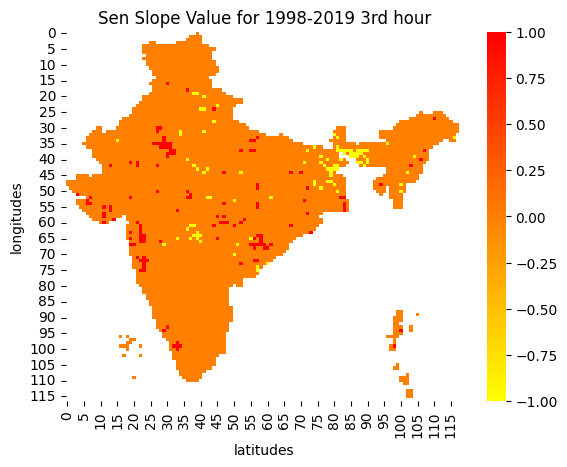

In [83]:
sns.heatmap(data=plot_data[::-1],cmap='autumn_r')
plt.title('Sen Slope Value for 1998-2019 3rd hour')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_3rd_hour.png',format='png')

## 6th hour

In [84]:
heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/{year}_eca_r10mm/{year}_06_eca_r10mm.nc')
    heavy_prec.append(data['heavy_precipitation_days_index_per_time_period'].values[0])
heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [85]:
row=0
col=0
year=1
data_all_year_heacy_prec = []
plot_data=[]
mk_test_all_values=[]
all_values_for_heavy_prec_on_each_grid = []
for grids in heavy_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_heacy_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_heacy_prec.append(grid_point)
        for index in range(1,22):
            # if(str(heavy_prec[index][row][col])!='nan'):
            data_all_year_heacy_prec.append(heavy_prec[index][row][col])
        all_values_for_heavy_prec_on_each_grid.append(data_all_year_heacy_prec)
        try:
            op = mk.original_test(data_all_year_heacy_prec) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1

In [86]:
plot_data = np.array(plot_data).reshape(117,119)

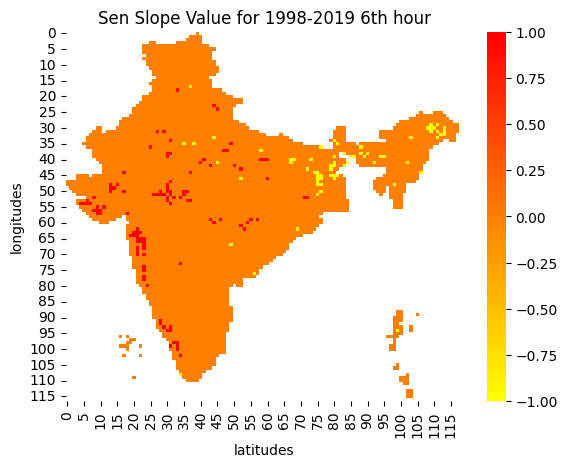

In [87]:
sns.heatmap(data=plot_data[::-1],cmap='autumn_r')
plt.title('Sen Slope Value for 1998-2019 6th hour')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_6th_hour.png',format='png')

## 9th Hour

In [88]:
heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/{year}_eca_r10mm/{year}_09_eca_r10mm.nc')
    heavy_prec.append(data['heavy_precipitation_days_index_per_time_period'].values[0])
heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [89]:
row=0
col=0
year=1
data_all_year_heacy_prec = []
plot_data=[]
mk_test_all_values=[]
all_values_for_heavy_prec_on_each_grid = []
for grids in heavy_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_heacy_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_heacy_prec.append(grid_point)
        for index in range(1,22):
            # if(str(heavy_prec[index][row][col])!='nan'):
            data_all_year_heacy_prec.append(heavy_prec[index][row][col])
        all_values_for_heavy_prec_on_each_grid.append(data_all_year_heacy_prec)
        try:
            op = mk.original_test(data_all_year_heacy_prec) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1

In [90]:
plot_data = np.array(plot_data).reshape(117,119)

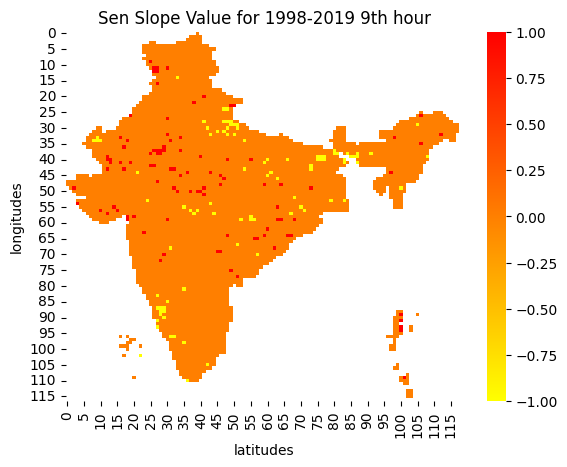

In [91]:
sns.heatmap(data=plot_data[::-1],cmap='autumn_r')
plt.title('Sen Slope Value for 1998-2019 9th hour')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_9th_hour.png',format='png')

## 12th hour

In [92]:
heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/{year}_eca_r10mm/{year}_12_eca_r10mm.nc')
    heavy_prec.append(data['heavy_precipitation_days_index_per_time_period'].values[0])
heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [93]:
row=0
col=0
year=1
data_all_year_heacy_prec = []
plot_data=[]
mk_test_all_values=[]
all_values_for_heavy_prec_on_each_grid = []
for grids in heavy_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_heacy_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_heacy_prec.append(grid_point)
        for index in range(1,22):
            # if(str(heavy_prec[index][row][col])!='nan'):
            data_all_year_heacy_prec.append(heavy_prec[index][row][col])
        all_values_for_heavy_prec_on_each_grid.append(data_all_year_heacy_prec)
        try:
            op = mk.original_test(data_all_year_heacy_prec) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1

In [94]:
plot_data = np.array(plot_data).reshape(117,119)

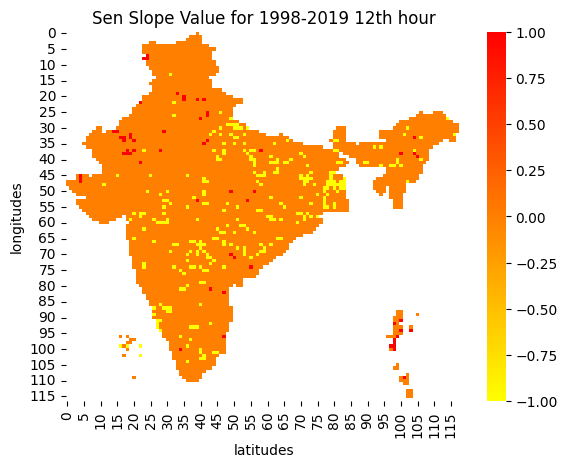

In [95]:
sns.heatmap(data=plot_data[::-1],cmap='autumn_r')
plt.title('Sen Slope Value for 1998-2019 12th hour')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_12th_hour.png',format='png')

## 15th Hour

In [23]:
heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/{year}_eca_r10mm/{year}_15_eca_r10mm.nc')
    heavy_prec.append(data['heavy_precipitation_days_index_per_time_period'].values[0])
heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [24]:
row=0
col=0
year=1
data_all_year_heacy_prec = []
plot_data=[]
mk_test_all_values=[]
all_values_for_heavy_prec_on_each_grid = []
for grids in heavy_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_heacy_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_heacy_prec.append(grid_point)
        for index in range(1,22):
            # if(str(heavy_prec[index][row][col])!='nan'):
            data_all_year_heacy_prec.append(heavy_prec[index][row][col])
        all_values_for_heavy_prec_on_each_grid.append(data_all_year_heacy_prec)
        try:
            op = mk.original_test(data_all_year_heacy_prec) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1

In [25]:
plot_data = np.array(plot_data).reshape(117,119)

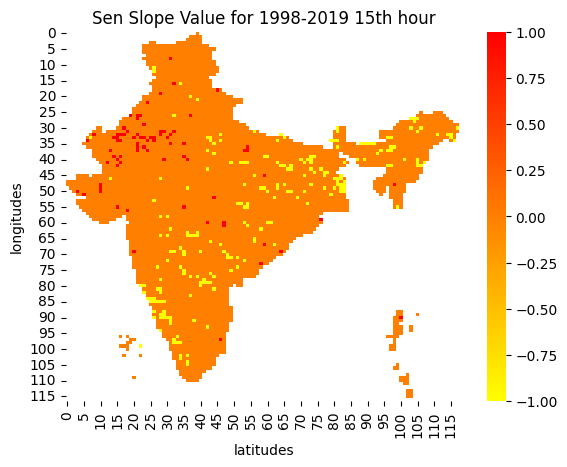

In [27]:
sns.heatmap(data=plot_data[::-1],cmap='autumn_r')
plt.title('Sen Slope Value for 1998-2019 15th hour')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_15th_hour.png',format='png')

## 18th Hour

In [96]:
heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/{year}_eca_r10mm/{year}_18_eca_r10mm.nc')
    heavy_prec.append(data['heavy_precipitation_days_index_per_time_period'].values[0])
heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [97]:
row=0
col=0
year=1
data_all_year_heacy_prec = []
plot_data=[]
mk_test_all_values=[]
all_values_for_heavy_prec_on_each_grid = []
for grids in heavy_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_heacy_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_heacy_prec.append(grid_point)
        for index in range(1,22):
            # if(str(heavy_prec[index][row][col])!='nan'):
            data_all_year_heacy_prec.append(heavy_prec[index][row][col])
        all_values_for_heavy_prec_on_each_grid.append(data_all_year_heacy_prec)
        try:
            op = mk.original_test(data_all_year_heacy_prec) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1

In [98]:
plot_data = np.array(plot_data).reshape(117,119)

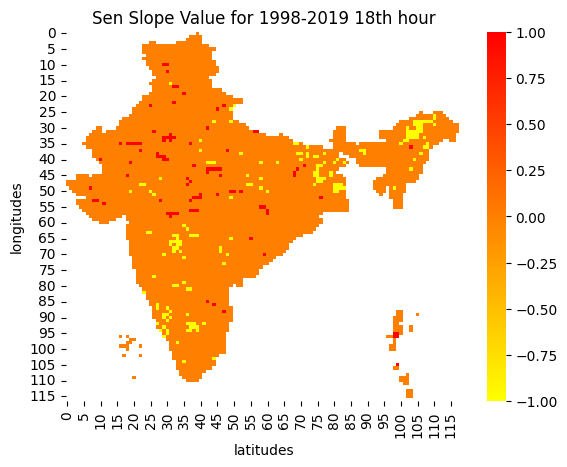

In [99]:
sns.heatmap(data=plot_data[::-1],cmap='autumn_r')
plt.title('Sen Slope Value for 1998-2019 18th hour')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_18th_hour.png',format='png')

## 21st Hour

In [33]:
heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/{year}_eca_r10mm/{year}_21_eca_r10mm.nc')
    heavy_prec.append(data['heavy_precipitation_days_index_per_time_period'].values[0])
heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [39]:
row=0
col=0
year=1
data_all_year_heacy_prec = []
plot_data=[]
mk_test_all_values=[]
all_values_for_heavy_prec_on_each_grid = []
for grids in heavy_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_heacy_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_heacy_prec.append(grid_point)
        for index in range(1,22):
            # if(str(heavy_prec[index][row][col])!='nan'):
            data_all_year_heacy_prec.append(heavy_prec[index][row][col])
        all_values_for_heavy_prec_on_each_grid.append(data_all_year_heacy_prec)
        try:
            op = mk.original_test(data_all_year_heacy_prec,0.1) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1

In [40]:
slope=[]
for i in mk_test_all_values:
    try:
        slope.append(i.slope)
        print(i.slope)
    except:
        slope.append(np.NaN)
        print(np.NaN)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.0
0.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [41]:
slope = np.array(slope).reshape(117,119)

In [42]:
heavy_prec_0_slope = xr.Dataset({
    "Heavy_Precipitation_Sen_Slope":(["lat","lon"],slope),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


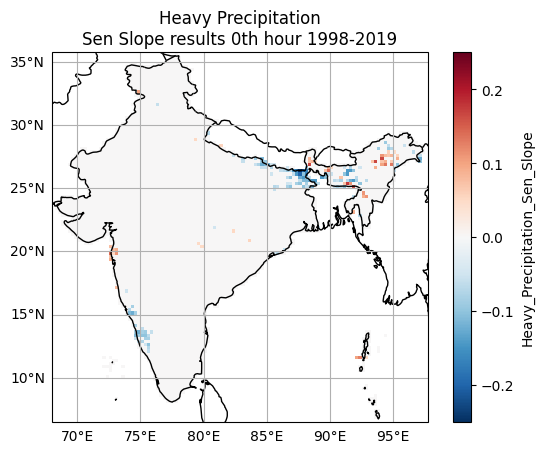

In [43]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
# lats = data['lat'].values
# lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
heavy_prec_0_slope['Heavy_Precipitation_Sen_Slope'].plot()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Heavy Precipitation\nSen Slope results 0th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

<Axes: >

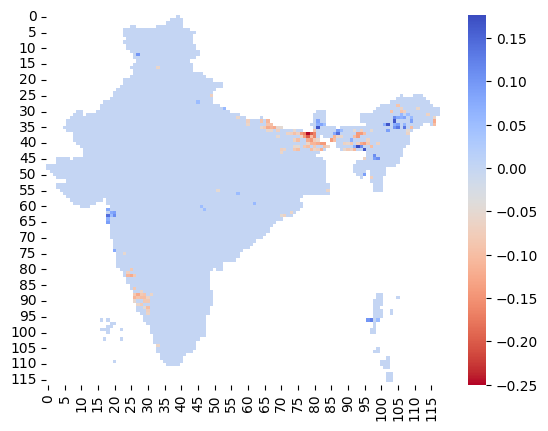

In [18]:
sns.heatmap(heavy_prec_0_slope['Heavy_Precipitation_Sen_Slope'][::-1],cmap="coolwarm_r")

In [73]:
plot_data = np.array(plot_data).reshape(117,119)

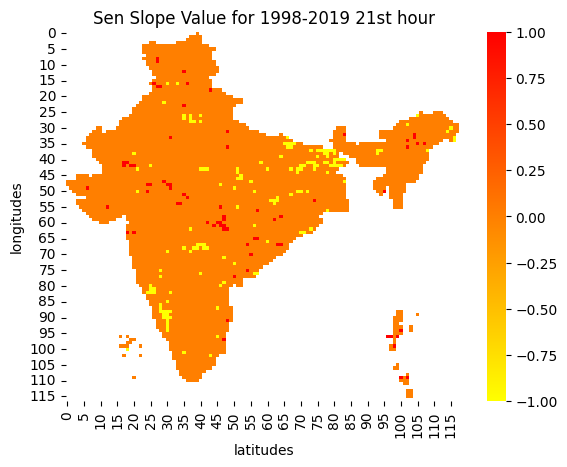

In [74]:
sns.heatmap(data=plot_data[::-1],cmap='autumn_r')
plt.title('Sen Slope Value for 1998-2019 21st hour')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_21st_hour.png',format='png')

# Animation

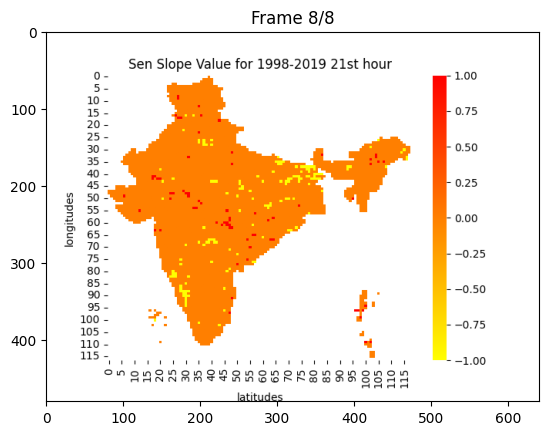

In [28]:
from matplotlib.animation import FuncAnimation

# Assume you have a list of Seaborn heat map images (e.g., saved as PNG files)
heatmap_images = ['./Heavy_Prec_0th_hour.png','./Heavy_Prec_3rd_hour.png','./Heavy_Prec_6th_hour.png','./Heavy_Prec_9th_hour.png','./Heavy_Prec_12th_hour.png','./Heavy_Prec_15th_hour.png','./Heavy_Prec_18th_hour.png','./Heavy_Prec_21st_hour.png']

# Create a function to update the displayed image in the animation
def update(frame):
    plt.clf()
    img = plt.imread(heatmap_images[frame])
    plt.imshow(img)
    plt.title(f"Frame {frame + 1}/{len(heatmap_images)}")

# Set up the animation
fig = plt.figure()
ani = FuncAnimation(fig, update, frames=len(heatmap_images), interval=400)  # 1000ms = 1 second

# To display the animation in a Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

# To save the animation as a video (e.g., MP4)
# ani.save("./heatmap_animation.mp4", writer="ffmpeg")

# To save the animation as a GIF
ani.save("heatmap_animation.gif", writer="pillow")

plt.show()

# Very Heavy Precipitaion

In [51]:
very_heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_R20MM_VERY_HEAVY_PRECIPITATION/{year}_eca_r20mm_stack.nc')
    very_heavy_prec.append(data['very_heavy_precipitation_days_index_per_time_period'].values[0])

In [53]:
row=0
col=0
year=1
data_all_year_very_heavy_prec = []
plot_data_very_heavy_prec=[]
mk_test_all_values_very_heavy_prec=[]
all_values_for_very_heavy_prec_on_each_grid = []
for grids in very_heavy_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_very_heavy_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_very_heavy_prec.append(grid_point)
        for index in range(1,22):
            # if(str(very_heavy_prec[index][row][col])!='nan'):
            data_all_year_very_heavy_prec.append(very_heavy_prec[index][row][col])
        all_values_for_very_heavy_prec_on_each_grid.append(data_all_year_very_heavy_prec)
        try:
            op = mk.original_test(data_all_year_very_heavy_prec) 
            mk_test_all_values_very_heavy_prec.append(op)
            if(op.trend=='increasing'):
                plot_data_very_heavy_prec.append(1)
            elif(op.trend=='no trend'):
                plot_data_very_heavy_prec.append(0)
            else:
                plot_data_very_heavy_prec.append(-1)
        except:
            plot_data_very_heavy_prec.append(np.nan)
            mk_test_all_values_very_heavy_prec.append(np.nan)
        col = col + 1
    row = row + 1

In [54]:
plot_data_very_heavy_prec = np.array(plot_data_very_heavy_prec).reshape(117,119)

<Axes: >

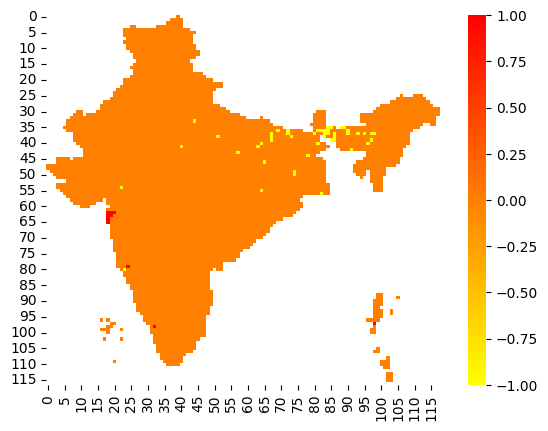

In [55]:
sns.heatmap(data=plot_data_very_heavy_prec[::-1],cmap='autumn_r')


In [11]:
stack_1998 = xr.open_dataset('../A_Stack_Yearwise/Stacks/2015/2015_0_stack.nc')
stack_1998['TRMM_3B42_7_precipitation']

<xarray.DataArray 'TRMM_3B42_7_precipitation' (time: 122, lat: 117, lon: 119)>
[1698606 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2015-05-31T22:30:00 ... 2015-09-29T22:30:00
  * lon      (lon) float64 68.12 68.38 68.62 68.88 ... 96.88 97.12 97.38 97.62
  * lat      (lat) float64 6.625 6.875 7.125 7.375 ... 34.88 35.12 35.38 35.62
Attributes:
    standard_name:       precipitation
    long_name:           Precipitation
    units:               mm/hr
    product_short_name:  TRMM_3B42
    product_version:     7
    quantity_type:       Precipitation

In [12]:
CDO.etccdi_r10mm(input=stack_1998,output='./2015_etccdi_r10mm.nc')

'./2015_etccdi_r10mm.nc'

In [7]:
CDO.eca_r10mm(input=stack_1998,output='./eca_r10mm.nc')


'./eca_r10mm.nc'

In [22]:
CDO.eca_r10mm(input='../A_Stack_Yearwise/Stacks/1999/1999_15_stack.nc',output='../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/1999_eca_r10mm/1999_15_eca_r10mm.nc')

'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/1999_eca_r10mm/1999_15_eca_r10mm.nc'

In [31]:
sdii = xr.open_dataset('../INDICES/simple_daily_sdii/1999_sdii.nc',decode_times=False)

In [36]:
sdii['simple_daily_intensity_index_per_time_period'][0].values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

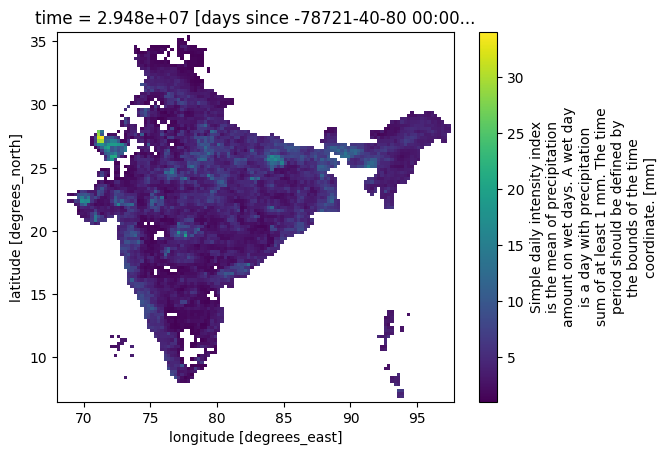

In [37]:
sdii['simple_daily_intensity_index_per_time_period'][0].plot()

In [40]:
CDO.etccdi_sdii(input='../A_Stack_Yearwise/Stacks/1998/1998_00_stack.nc',output='./SDII.nc')

'./SDII.nc'

In [41]:
CDO.eca_sdii(input='../A_Stack_Yearwise/Stacks/1998/1998_00_stack.nc',output='./SDII.nc')

'./SDII.nc'

## Other

## 1. pre_whitening_modification_test

In [68]:
heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/{year}_eca_r10mm/{year}_00_eca_r10mm.nc')
    heavy_prec.append(data['heavy_precipitation_days_index_per_time_period'].values[0])
heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [78]:
row=0
col=0
year=1
data_all_year_heacy_prec = []
plot_data=[]
mk_test_all_values=[]
all_values_for_heavy_prec_on_each_grid = []
for grids in heavy_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_heacy_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_heacy_prec.append(grid_point)
        for index in range(1,22):
            # if(str(heavy_prec[index][row][col])!='nan'):
            data_all_year_heacy_prec.append(heavy_prec[index][row][col])
        all_values_for_heavy_prec_on_each_grid.append(data_all_year_heacy_prec)
        try:
            op = mk.pre_whitening_modification_test(data_all_year_heacy_prec) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:54: RuntimeWarning: Mean of empty slice.
  y = x - x.mean()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:60: RuntimeWarning: invalid value encountered in divide
  return acov[:nlags+1]/acov[0]


In [79]:
plot_data = np.array(plot_data).reshape(117,119)

Text(50.722222222222214, 0.5, 'longitudes')

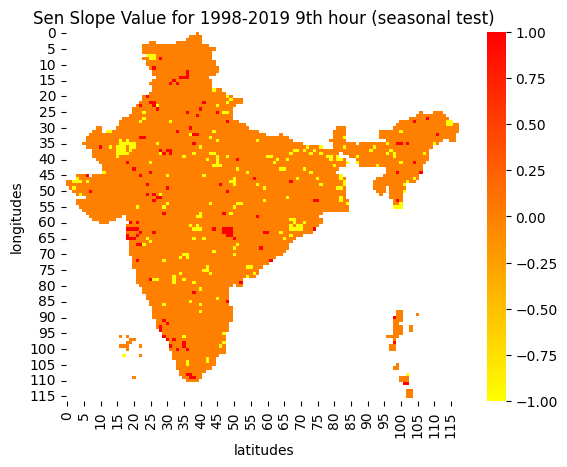

In [80]:
sns.heatmap(data=plot_data[::-1],cmap='autumn_r')
plt.title('Sen Slope Value for 1998-2019 9th hour (seasonal test)')
plt.xlabel('latitudes')
plt.ylabel('longitudes')

## 2. yue_wang_modification_test

## 0th Hour

In [19]:
heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/{year}_eca_r10mm/{year}_00_eca_r10mm.nc')
    heavy_prec.append(data['heavy_precipitation_days_index_per_time_period'].values[0])
heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [20]:
row=0
col=0
year=1
data_all_year_heacy_prec = []
plot_data=[]
mk_test_all_values=[]
all_values_for_heavy_prec_on_each_grid = []
for grids in heavy_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_heacy_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_heacy_prec.append(grid_point)
        for index in range(1,22):
            # if(str(heavy_prec[index][row][col])!='nan'):
            data_all_year_heacy_prec.append(heavy_prec[index][row][col])
        all_values_for_heavy_prec_on_each_grid.append(data_all_year_heacy_prec)
        try:
            op = mk.yue_wang_modification_test(data_all_year_heacy_prec) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:60: RuntimeWarning: invalid value encountered in divide
  return acov[:nlags+1]/acov[0]


In [21]:
slope=[]
for i in mk_test_all_values:
    try:
        slope.append(i.slope)
        print(i.slope)
    except:
        slope.append(np.NaN)
        print(np.NaN)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.0
0.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [23]:
slope = np.array(slope).reshape(117,119)

In [24]:
heavy_prec_0_slope = xr.Dataset({
    "Heavy_Precipitation_Sen_Slope":(["lat","lon"],slope),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


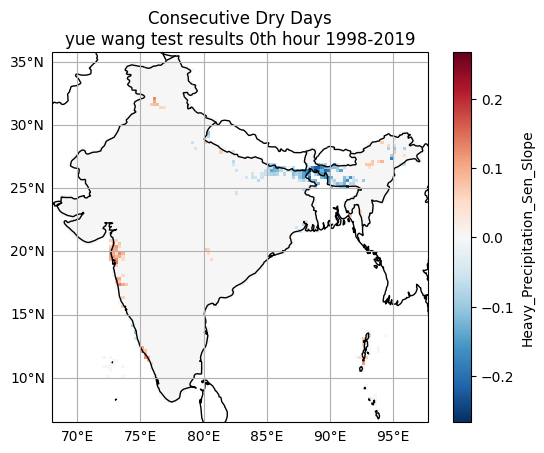

In [25]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
# lats = data['lat'].values
# lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
heavy_prec_0_slope['Heavy_Precipitation_Sen_Slope'].plot()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Consecutive Dry Days\nyue wang test results 0th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

In [334]:
plot_data = np.array(plot_data).reshape(117,119)

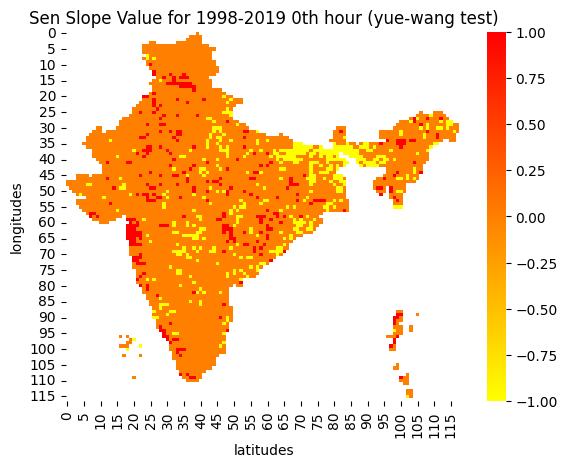

In [335]:
sns.heatmap(data=plot_data[::-1],cmap='autumn_r')
plt.title('Sen Slope Value for 1998-2019 0th hour (yue-wang test)')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
# plt.savefig('./Heavy_Prec_0th_hour_yue_wang_test.png',format='png')

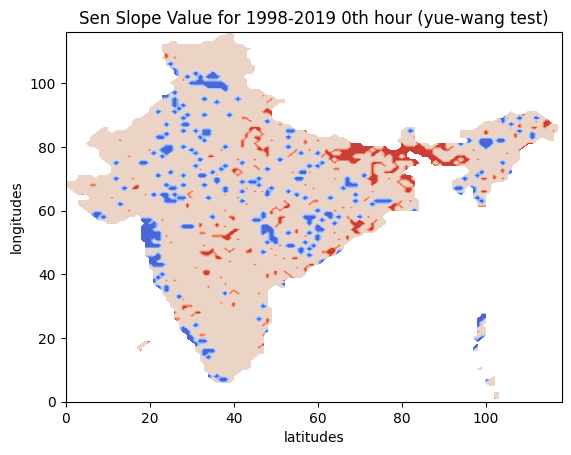

In [336]:
plt.contourf(plot_data,cmap='coolwarm_r')
plt.title('Sen Slope Value for 1998-2019 0th hour (yue-wang test)')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_0th_hour_contourf.png',format='png')

## 3rd hour

In [337]:
heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/{year}_eca_r10mm/{year}_03_eca_r10mm.nc')
    heavy_prec.append(data['heavy_precipitation_days_index_per_time_period'].values[0])
heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [338]:
row=0
col=0
year=1
data_all_year_heacy_prec = []
plot_data=[]
mk_test_all_values=[]
all_values_for_heavy_prec_on_each_grid = []
for grids in heavy_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_heacy_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_heacy_prec.append(grid_point)
        for index in range(1,22):
            # if(str(heavy_prec[index][row][col])!='nan'):
            data_all_year_heacy_prec.append(heavy_prec[index][row][col])
        all_values_for_heavy_prec_on_each_grid.append(data_all_year_heacy_prec)
        try:
            op = mk.yue_wang_modification_test(data_all_year_heacy_prec) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:60: RuntimeWarning: invalid value encountered in divide
  return acov[:nlags+1]/acov[0]


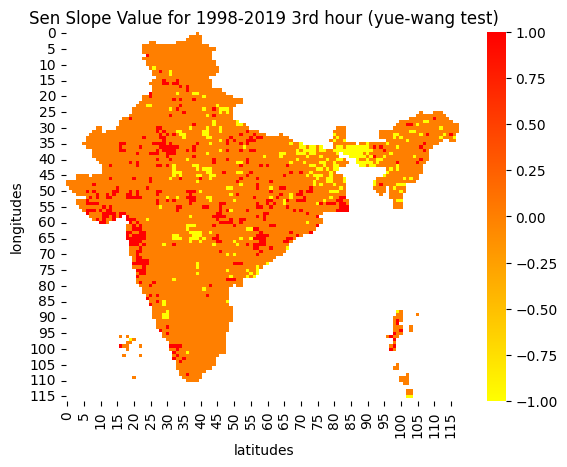

In [339]:
plot_data = np.array(plot_data).reshape(117,119)
sns.heatmap(data=plot_data[::-1],cmap='autumn_r')
plt.title('Sen Slope Value for 1998-2019 3rd hour (yue-wang test)')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_3rd_hour_yue_wang_test.png',format='png')

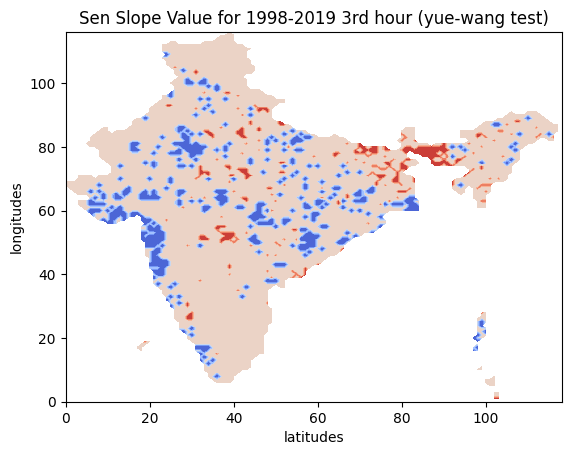

In [340]:
plt.contourf(plot_data,cmap='coolwarm_r')
plt.title('Sen Slope Value for 1998-2019 3rd hour (yue-wang test)')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_3rd_hour_contourf.png',format='png')

## 6th hour

In [341]:
heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/{year}_eca_r10mm/{year}_06_eca_r10mm.nc')
    heavy_prec.append(data['heavy_precipitation_days_index_per_time_period'].values[0])
heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [342]:
row=0
col=0
year=1
data_all_year_heacy_prec = []
plot_data=[]
mk_test_all_values=[]
all_values_for_heavy_prec_on_each_grid = []
for grids in heavy_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_heacy_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_heacy_prec.append(grid_point)
        for index in range(1,22):
            # if(str(heavy_prec[index][row][col])!='nan'):
            data_all_year_heacy_prec.append(heavy_prec[index][row][col])
        all_values_for_heavy_prec_on_each_grid.append(data_all_year_heacy_prec)
        try:
            op = mk.yue_wang_modification_test(data_all_year_heacy_prec) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:60: RuntimeWarning: invalid value encountered in divide
  return acov[:nlags+1]/acov[0]


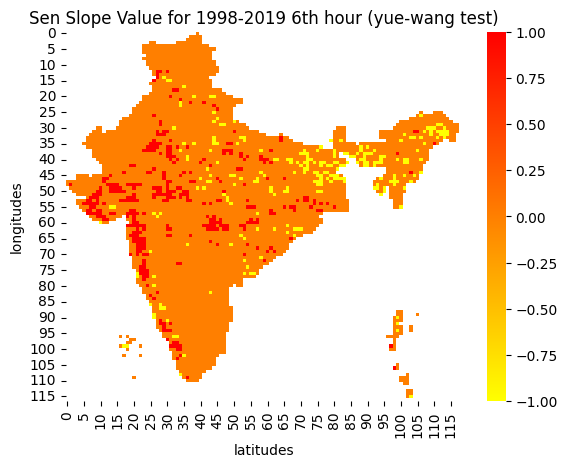

In [343]:
plot_data = np.array(plot_data).reshape(117,119)
sns.heatmap(data=plot_data[::-1],cmap='autumn_r')
plt.title('Sen Slope Value for 1998-2019 6th hour (yue-wang test)')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_6th_hour_yue_wang_test.png',format='png')

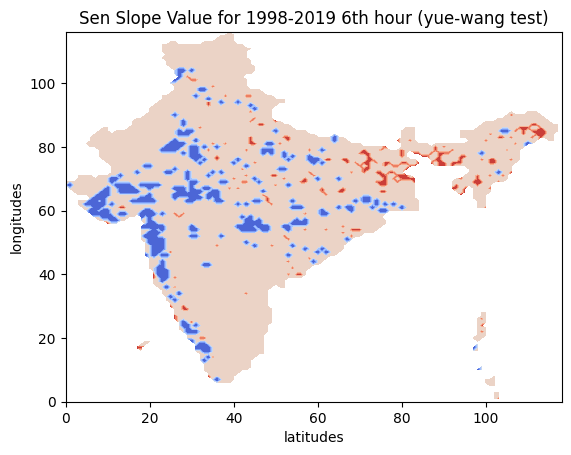

In [344]:
plt.contourf(plot_data,cmap='coolwarm_r')
plt.title('Sen Slope Value for 1998-2019 6th hour (yue-wang test)')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_6th_hour_contourf.png',format='png')

## 9th hour

In [345]:
heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/{year}_eca_r10mm/{year}_09_eca_r10mm.nc')
    heavy_prec.append(data['heavy_precipitation_days_index_per_time_period'].values[0])
heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [346]:
row=0
col=0
year=1
data_all_year_heacy_prec = []
plot_data=[]
mk_test_all_values=[]
all_values_for_heavy_prec_on_each_grid = []
for grids in heavy_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_heacy_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_heacy_prec.append(grid_point)
        for index in range(1,22):
            # if(str(heavy_prec[index][row][col])!='nan'):
            data_all_year_heacy_prec.append(heavy_prec[index][row][col])
        all_values_for_heavy_prec_on_each_grid.append(data_all_year_heacy_prec)
        try:
            op = mk.yue_wang_modification_test(data_all_year_heacy_prec) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:60: RuntimeWarning: invalid value encountered in divide
  return acov[:nlags+1]/acov[0]


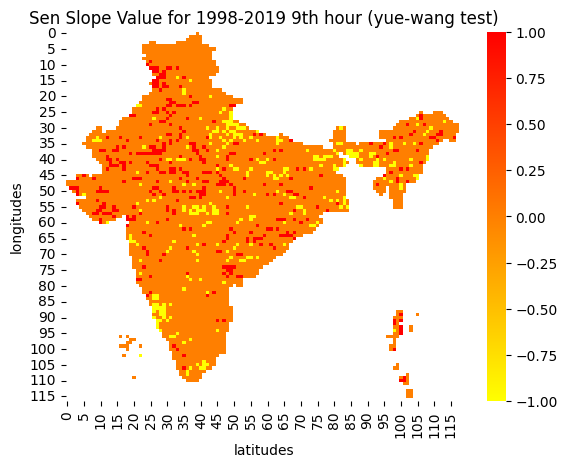

In [347]:
plot_data = np.array(plot_data).reshape(117,119)
sns.heatmap(data=plot_data[::-1],cmap='autumn_r')
plt.title('Sen Slope Value for 1998-2019 9th hour (yue-wang test)')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_9th_hour_yue_wang_test.png',format='png')

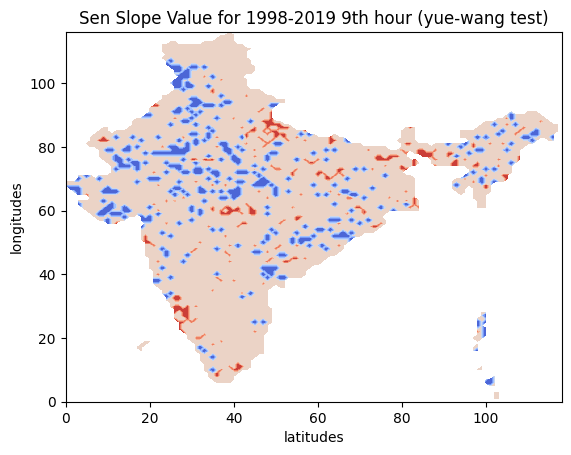

In [348]:
plt.contourf(plot_data,cmap='coolwarm_r')
plt.title('Sen Slope Value for 1998-2019 9th hour (yue-wang test)')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_9th_hour_contourf.png',format='png')

## 12th hour

In [349]:
heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/{year}_eca_r10mm/{year}_12_eca_r10mm.nc')
    heavy_prec.append(data['heavy_precipitation_days_index_per_time_period'].values[0])
heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [350]:
row=0
col=0
year=1
data_all_year_heacy_prec = []
plot_data=[]
mk_test_all_values=[]
all_values_for_heavy_prec_on_each_grid = []
for grids in heavy_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_heacy_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_heacy_prec.append(grid_point)
        for index in range(1,22):
            # if(str(heavy_prec[index][row][col])!='nan'):
            data_all_year_heacy_prec.append(heavy_prec[index][row][col])
        all_values_for_heavy_prec_on_each_grid.append(data_all_year_heacy_prec)
        try:
            op = mk.yue_wang_modification_test(data_all_year_heacy_prec) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:60: RuntimeWarning: invalid value encountered in divide
  return acov[:nlags+1]/acov[0]


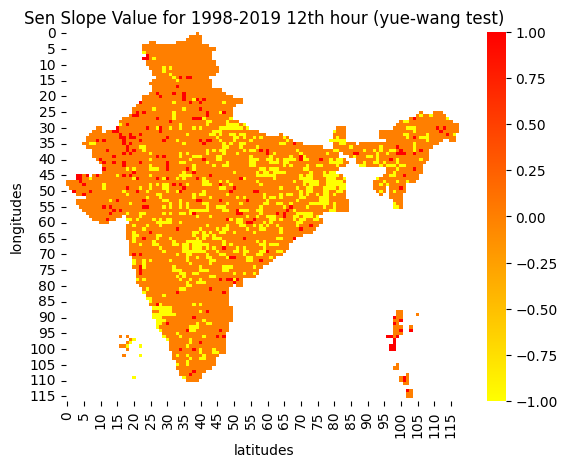

In [351]:
plot_data = np.array(plot_data).reshape(117,119)
sns.heatmap(data=plot_data[::-1],cmap='autumn_r')
plt.title('Sen Slope Value for 1998-2019 12th hour (yue-wang test)')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_12th_hour_yue_wang_test.png',format='png')

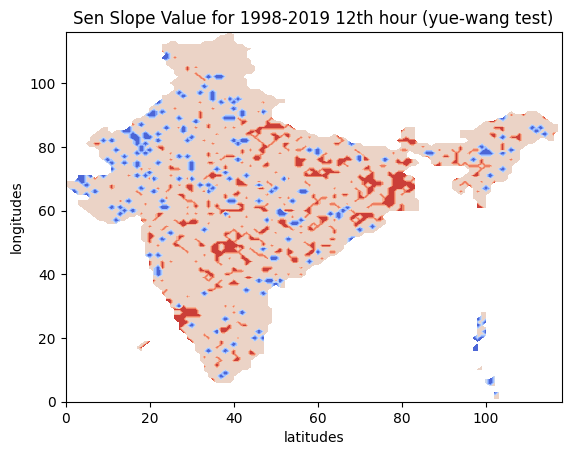

In [352]:
plt.contourf(plot_data,cmap='coolwarm_r')
plt.title('Sen Slope Value for 1998-2019 12th hour (yue-wang test)')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_12th_hour_contourf.png',format='png')

## 15th Hour

In [353]:
heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/{year}_eca_r10mm/{year}_15_eca_r10mm.nc')
    heavy_prec.append(data['heavy_precipitation_days_index_per_time_period'].values[0])
heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [354]:
row=0
col=0
year=1
data_all_year_heacy_prec = []
plot_data=[]
mk_test_all_values=[]
all_values_for_heavy_prec_on_each_grid = []
for grids in heavy_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_heacy_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_heacy_prec.append(grid_point)
        for index in range(1,22):
            # if(str(heavy_prec[index][row][col])!='nan'):
            data_all_year_heacy_prec.append(heavy_prec[index][row][col])
        all_values_for_heavy_prec_on_each_grid.append(data_all_year_heacy_prec)
        try:
            op = mk.yue_wang_modification_test(data_all_year_heacy_prec) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:60: RuntimeWarning: invalid value encountered in divide
  return acov[:nlags+1]/acov[0]


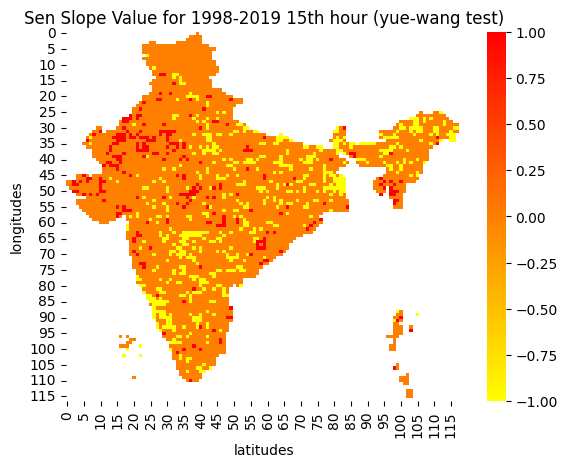

In [355]:
plot_data = np.array(plot_data).reshape(117,119)
sns.heatmap(data=plot_data[::-1],cmap='autumn_r')
plt.title('Sen Slope Value for 1998-2019 15th hour (yue-wang test)')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_15th_hour_yue_wang_test.png',format='png')

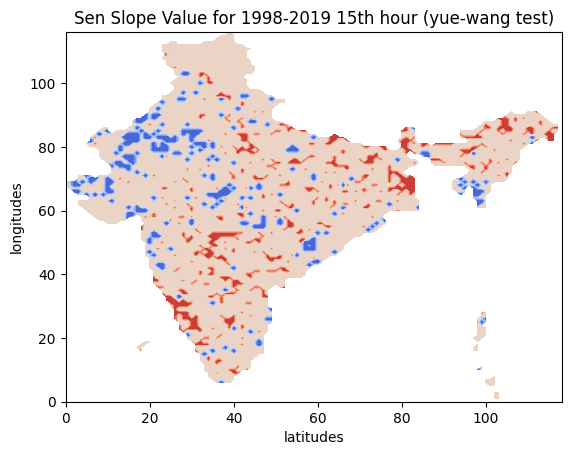

In [356]:
plt.contourf(plot_data,cmap='coolwarm_r')
plt.title('Sen Slope Value for 1998-2019 15th hour (yue-wang test)')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_15th_hour_contourf.png',format='png')

## 18th Hour

In [357]:
heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/{year}_eca_r10mm/{year}_18_eca_r10mm.nc')
    heavy_prec.append(data['heavy_precipitation_days_index_per_time_period'].values[0])
heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [358]:
row=0
col=0
year=1
data_all_year_heacy_prec = []
plot_data=[]
mk_test_all_values=[]
all_values_for_heavy_prec_on_each_grid = []
for grids in heavy_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_heacy_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_heacy_prec.append(grid_point)
        for index in range(1,22):
            # if(str(heavy_prec[index][row][col])!='nan'):
            data_all_year_heacy_prec.append(heavy_prec[index][row][col])
        all_values_for_heavy_prec_on_each_grid.append(data_all_year_heacy_prec)
        try:
            op = mk.yue_wang_modification_test(data_all_year_heacy_prec) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:60: RuntimeWarning: invalid value encountered in divide
  return acov[:nlags+1]/acov[0]


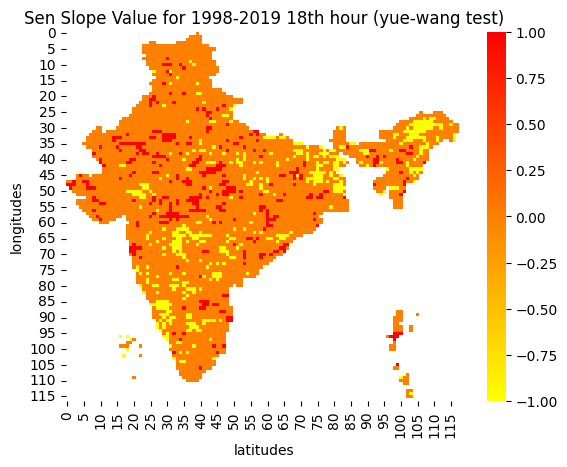

In [359]:
plot_data = np.array(plot_data).reshape(117,119)
sns.heatmap(data=plot_data[::-1],cmap='autumn_r')
plt.title('Sen Slope Value for 1998-2019 18th hour (yue-wang test)')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_18th_hour_yue_wang_test.png',format='png')

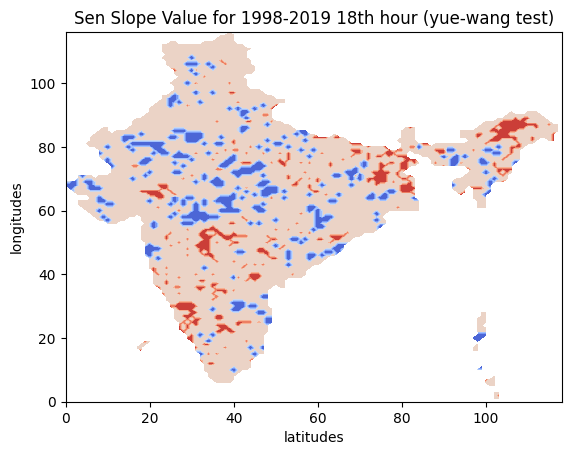

In [360]:
plt.contourf(plot_data,cmap='coolwarm_r')
plt.title('Sen Slope Value for 1998-2019 18th hour (yue-wang test)')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_18th_hour_contourf.png',format='png')

## 21st hour

In [3]:
heavy_prec = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/{year}_eca_r10mm/{year}_21_eca_r10mm.nc')
    heavy_prec.append(data['heavy_precipitation_days_index_per_time_period'].values[0])
heavy_prec

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [4]:
row=0
col=0
year=1
data_all_year_heacy_prec = []
plot_data=[]
mk_test_all_values=[]
all_values_for_heavy_prec_on_each_grid = []
for grids in heavy_prec[0]:
    col=0
    for grid_point in grids:
        data_all_year_heacy_prec = []
        # if(str(grid_point)!='nan'):
        data_all_year_heacy_prec.append(grid_point)
        for index in range(1,22):
            # if(str(heavy_prec[index][row][col])!='nan'):
            data_all_year_heacy_prec.append(heavy_prec[index][row][col])
        all_values_for_heavy_prec_on_each_grid.append(data_all_year_heacy_prec)
        try:
            op = mk.yue_wang_modification_test(data_all_year_heacy_prec) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:60: RuntimeWarning: invalid value encountered in divide
  return acov[:nlags+1]/acov[0]


In [5]:
plot_data = np.array(plot_data).reshape(117,119)

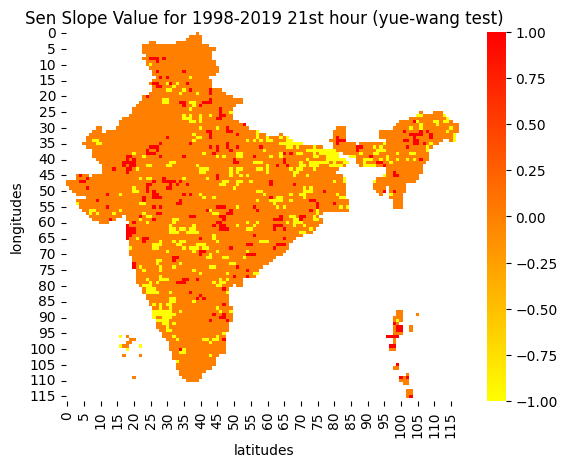

In [16]:
plot_data = np.array(plot_data).reshape(117,119)
sns.heatmap(data=plot_data[::-1],cmap='autumn_r')
plt.title('Sen Slope Value for 1998-2019 21st hour (yue-wang test)')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_21st_hour_yue_wang_test.png',format='png')

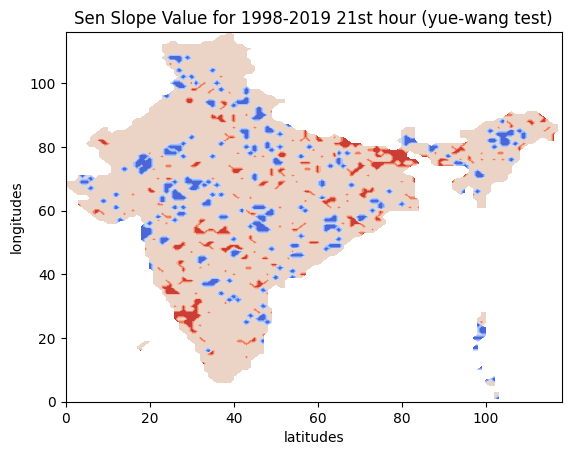

In [364]:
plt.contourf(plot_data,cmap='coolwarm_r')
plt.title('Sen Slope Value for 1998-2019 21st hour (yue-wang test)')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.savefig('./Heavy_Prec_21st_hour_contourf.png',format='png')

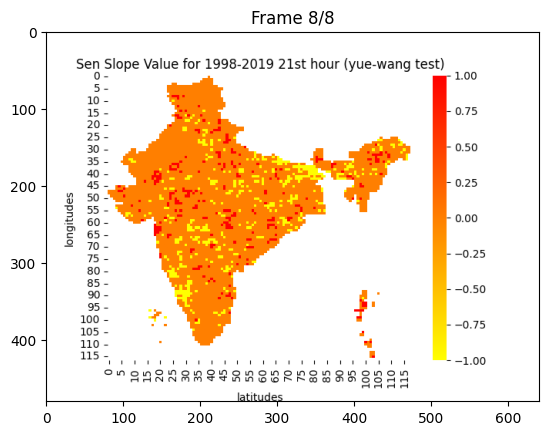

In [141]:
from matplotlib.animation import FuncAnimation

# Assume you have a list of Seaborn heat map images (e.g., saved as_yue_wang_test PNG files)
heatmap_images = ['./Heavy_Prec_0th_hour_yue_wang_test.png','./Heavy_Prec_3rd_hour_yue_wang_test.png','./Heavy_Prec_6th_hour_yue_wang_test.png','./Heavy_Prec_9th_hour_yue_wang_test.png','./Heavy_Prec_12th_hour_yue_wang_test.png','./Heavy_Prec_15th_hour_yue_wang_test.png','./Heavy_Prec_18th_hour_yue_wang_test.png','./Heavy_Prec_21st_hour_yue_wang_test.png']

# Create a function to update the displayed image in the animation
def update(frame):
    plt.clf()
    img = plt.imread(heatmap_images[frame])
    plt.imshow(img)
    plt.title(f"Frame {frame + 1}/{len(heatmap_images)}")

# Set up the animation
fig = plt.figure()
ani = FuncAnimation(fig, update, frames=len(heatmap_images), interval=400)  # 1000ms = 1 second

# To display the animation in a Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

# To save the animation as a video (e.g., MP4)
# ani.save("./heatmap_animation.mp4", writer="ffmpeg")

# To save the animation as a GIF
ani.save("heatmap_animation_yue_wang_test.gif", writer="pillow")

plt.show()

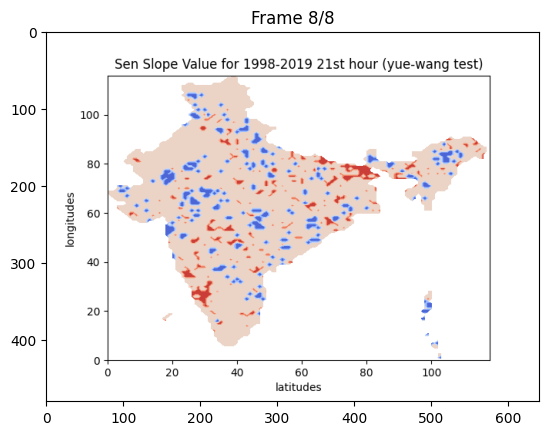

In [366]:
from matplotlib.animation import FuncAnimation

# Assume you have a list of Seaborn heat map images (e.g., saved as_yue_wang_test PNG files)
heatmap_images = ['./Heavy_Prec_0th_hour_contourf.png','./Heavy_Prec_3rd_hour_contourf.png','./Heavy_Prec_6th_hour_contourf.png','./Heavy_Prec_9th_hour_contourf.png','./Heavy_Prec_12th_hour_contourf.png','./Heavy_Prec_15th_hour_contourf.png','./Heavy_Prec_18th_hour_contourf.png','./Heavy_Prec_21st_hour_contourf.png']

# Create a function to update the displayed image in the animation
def update(frame):
    plt.clf()
    img = plt.imread(heatmap_images[frame])
    plt.imshow(img)
    plt.title(f"Frame {frame + 1}/{len(heatmap_images)}")

# Set up the animation
fig = plt.figure()
ani = FuncAnimation(fig, update, frames=len(heatmap_images), interval=600)  # 1000ms = 1 second

# To display the animation in a Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

# To save the animation as a video (e.g., MP4)
# ani.save("./heatmap_animation.mp4", writer="ffmpeg")

# To save the animation as a GIF
ani.save("heatmap_animation_contourf.gif", writer="pillow")

plt.show()

# TP

In [34]:
plot_data = pd.DataFrame(plot_data).fillna(-2)

In [30]:
color = sns.color_palette(['#000000','#0000FF','#ffffff','#ff0000'])

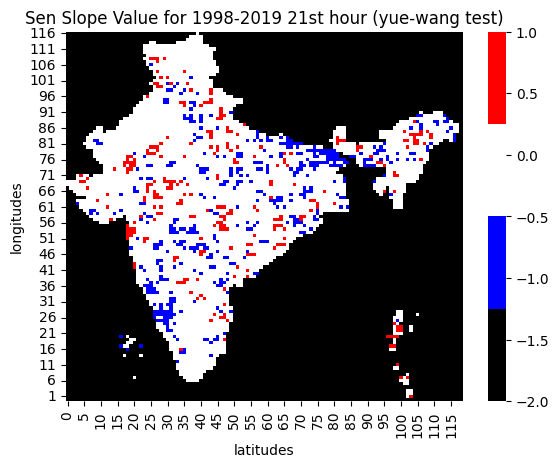

In [131]:
fig,ax = plt.subplots()
sns.heatmap(plot_data[::-1],cmap=color)
plt.title('Sen Slope Value for 1998-2019 21st hour (yue-wang test)')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.show()

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'",

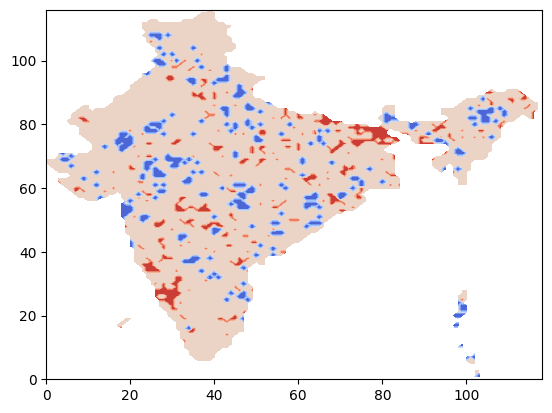

In [331]:
# color_2 = ['#000000','#0000FF','#ffffff','#ff0000']
plt.contourf(plot_data,cmap='coolwarm_r')
# Accent,twilight_shifted,twilight_shifted_r,bwr,bwr_r,Spectral,Spectral_r,seismic,seismic_r,coolwarm,coolwarm_r

In [1]:
a = [1,2,3,4,5,6,7,8,9]
plt.plot(a,marker="o")

NameError: name 'plt' is not defined

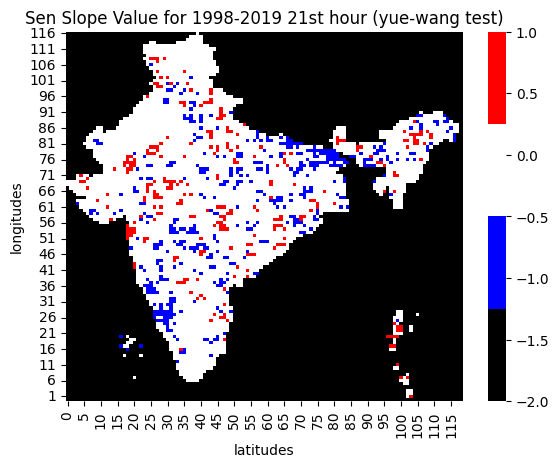

In [53]:
fig,ax = plt.subplots()
sns.heatmap(plot_data[::-1],cmap=color)
plt.title('Sen Slope Value for 1998-2019 21st hour (yue-wang test)')
plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.show()

# creating a dataset for plot data

In [55]:
p = xr.DataArray(plot_data,dims=["x","y"])

In [68]:
ds_21 = xr.Dataset({
    "Heavy_Precipitation_Yue_Wang_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)

In [84]:
ds_21

<xarray.Dataset>
Dimensions:                               (lat: 117, lon: 119)
Coordinates:
  * lat                                   (lat) float64 6.625 6.875 ... 35.62
  * lon                                   (lon) float64 68.12 68.38 ... 97.62
Data variables:
    Heavy_Precipitation_Yue_Wang_Results  (lat, lon) float64 nan nan ... nan nan

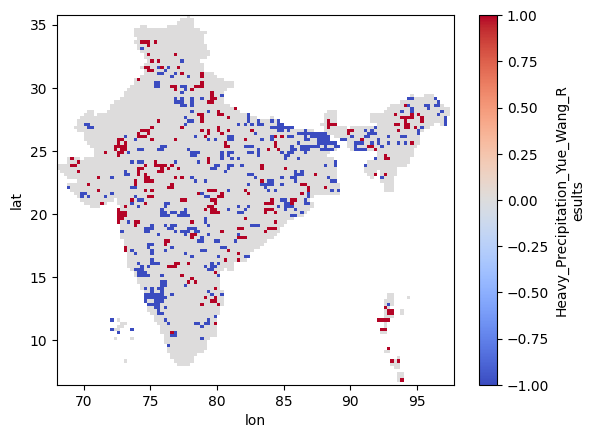

In [77]:
ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot(cmap="coolwarm")

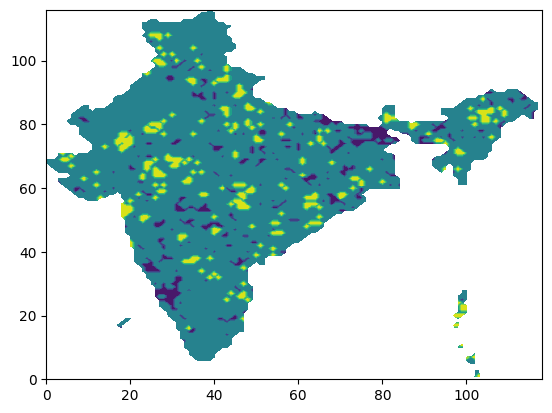

In [100]:
plt.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'].values)

In [102]:
x = range(117)
x

range(0, 117)

In [104]:
pip install Basemap

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/156.6 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 2.4 MB/s eta 0:00:0000:0100:01
  error: subprocess-exited-with-error
  
  × Building wheel for Basemap (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [34 lines of output]
      <string>:58: RuntimeWarning: Cannot find GEOS library and/or headers in standard locations ('/Users/yuvrajsinhdilipsinhbodana/local', '/Users/yuvrajsinhdilipsinhbodana', '/usr/local', '/usr', '/opt/local', '/opt', '/sw'). Please install the corresponding packages using your software management system or set the environment variable GEOS_DIR to point to the location where GEOS is installed (for example, if 'geos_c.h' is in '/usr/local/incl

In [121]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
Note: you may need to restart the kernel to use updated packages.


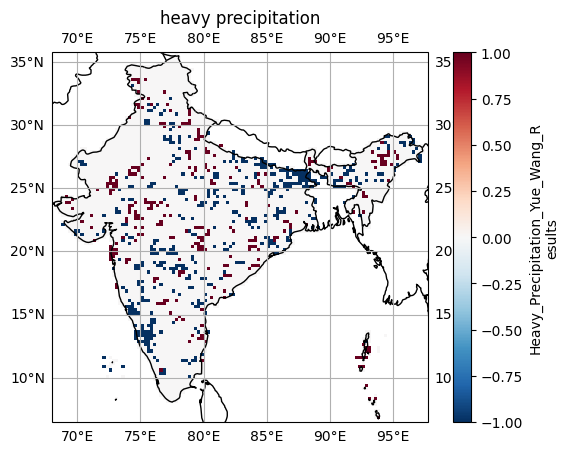

In [162]:
import cartopy.crs as ccrs
import cartopy.feature

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.gridlines(draw_labels=True)
lats = data['lat'].values
lons = data['lon'].values[:-2]
ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot()
ax.plot(lons,lats,color="#00000000")


plt.title('heavy precipitation')
plt.show()


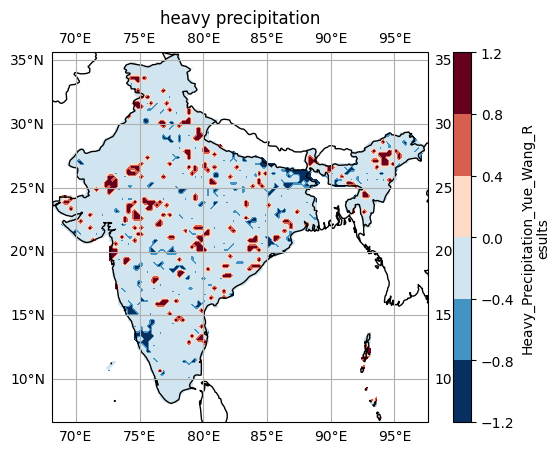

In [275]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.gridlines(draw_labels=True)
lats = data['lat'].values
lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf()

ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('heavy precipitation')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

In [170]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'",